# Setup

import basic packages needed for this study.

In [1]:
import numpy as np
import pandas as pd
import time
from collections import OrderedDict

import tensorflow and keras

In [2]:
import tensorflow as tf

In [3]:
import keras

Using TensorFlow backend.


Plotting Setup

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# IMDB Dataset

Loading the IMDB data for use but only use the top 20000 words and the first 500 wrods of each review for this research.

In [5]:
from keras.datasets import imdb
from keras import preprocessing

In [6]:
max_features = 20000
maxlen = 500

In [7]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Dense Neural Netwrok

As the first step of this research, we will consider using dense neural network to classify the movie review into two categories: positvie (1) and negative (0). This is a binary classification problem.

We will use a dense neural network with two (2) hidden layers. The hyperparametters to consider are: (1) number of hidden nodes in each layer: 32 vs. 64; (2) optimizer: SGD vs. rmsprop; (3) embedding dimensionality: 8 vs. 32. Therefore, this is a benchmark experiment in 3x2 factor design. We will compare each model in (1) predictive accuracy on both train and valdation set; (2) loss on both train and validation set; (3) train time.

We will use an embedding layers. After selecting the preferred model, we will use the the ReduceLROnPlateau callback to finetune its learning rate for futhre performance improvement. Dropout or BatchNormalization will be considered if overfitting is an issue. 

Turn the list into a 2D tensors.

In [8]:
from keras import preprocessing

In [9]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

Define the structure of the dense neural network using an Embedding layer.

In [10]:
from keras import models
from keras import layers

In [11]:
def dense_model(dimension, node, optimizer):
    model=models.Sequential()
    model.add(layers.Embedding(max_features, dimension, input_length=maxlen))
    model.add(layers.Flatten())
    model.add(layers.Dense(node, activation='relu'))
    model.add(layers.Dense(node, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

Define the name of each model in this experiment, and specify the 2 levels of values for each factor.

In [12]:
names=['32-nodes-SGD-8-dimensions',
      '32-nodes-SGD-64-dimensions',
      '32-nodes-rmsprop-8-dimensions',
      '32-nodes-rmsprop-64-dimensions',
      '64-nodes-SGD-8-dimensions',
      '64-nodes-SGD-64-dimensions',
      '64-nodes-rmsprop-8-dimensions',
      '64-nodes-rmsprop-64-dimensions']

nodes=[32, 32, 32, 32, 64, 64, 64, 64]
optimizers=['SGD', 'SGD', 'rmsprop', 'rmsprop','SGD', 'SGD', 'rmsprop','rmsprop']
dimensions=[8,64,8,64,8,64,8,64]

Set up empty list to stroe the results. 

In [13]:
index_for_method=0 
dense_training_accuracy=[]
dense_validation_accuracy=[]
dense_training_loss=[]
dense_validation_loss=[]
dense_time=[]

Run the experiment epochs=10 and bacth_size=64.

In [14]:
for name, node, optimizer, dimension in zip(names, nodes, optimizers, dimensions):
    print('\n--------------------------------')
    print('\Processing Training Method:', name)
    start_time=time.clock()
    model=dense_model(dimension, node, optimizer)
    history=model.fit(x_train, y_train,
                     epochs=10,
                     batch_size=64,
                     validation_split=0.2)
    end_time=time.clock()
    train_acc=history.history['acc']
    train_loss=history.history['loss']
    val_acc=history.history['val_acc']
    val_loss=history.history['val_loss']
    run_time=end_time-start_time
    dense_training_accuracy.append(train_acc)
    dense_validation_accuracy.append(val_acc)
    dense_training_loss.append(train_loss)
    dense_validation_loss.append(val_loss)
    dense_time.append(run_time)
                
    index_for_method += 1


--------------------------------
\Processing Training Method: 32-nodes-SGD-8-dimensions
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 126us/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6931 - val_acc: 0.5064
Epoch 2/10
20000/20000 [==============================] - 2s 114us/step - loss: 0.6929 - acc: 0.5098 - val_loss: 0.6931 - val_acc: 0.5048
Epoch 3/10
20000/20000 [==============================] - 2s 96us/step - loss: 0.6927 - acc: 0.5179 - val_loss: 0.6930 - val_acc: 0.5120
Epoch 4/10
20000/20000 [==============================] - 2s 100us/step - loss: 0.6925 - acc: 0.5221 - val_loss: 0.6929 - val_acc: 0.5154
Epoch 5/10
20000/20000 [==============================] - 2s 101us/step - loss: 0.6923 - acc: 0.5224 - val_loss: 0.6929 - val_acc: 0.5152
Epoch 6/10
20000/20000 [=============================

Plot the train and val accuracy of each model through the training time.

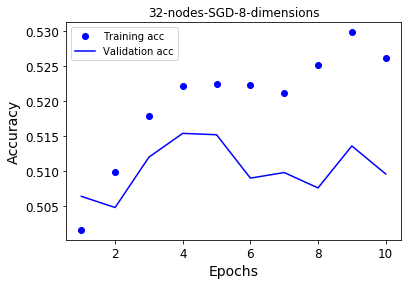

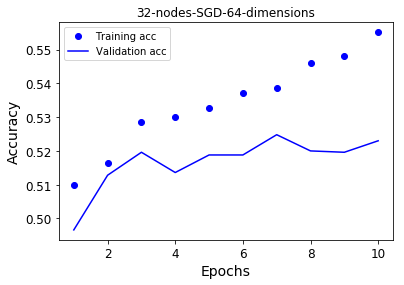

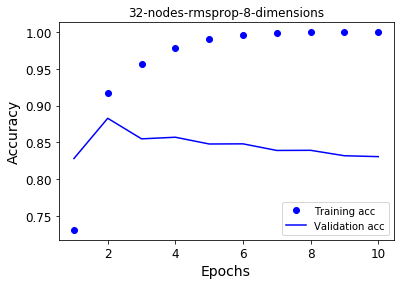

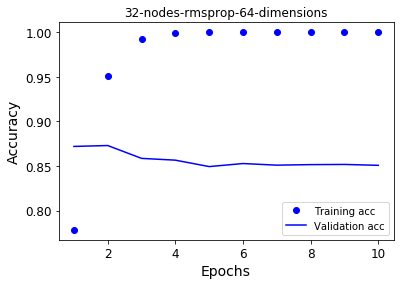

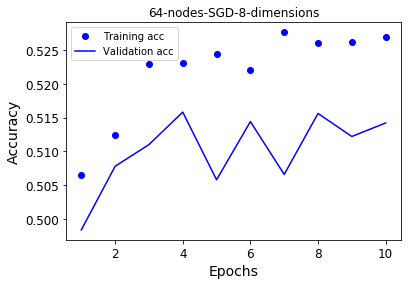

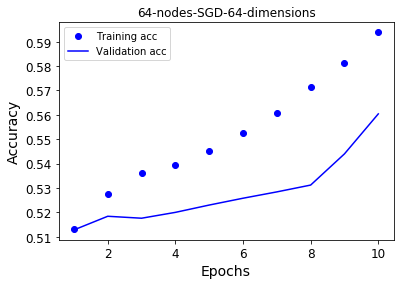

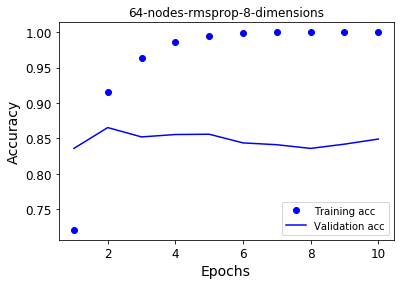

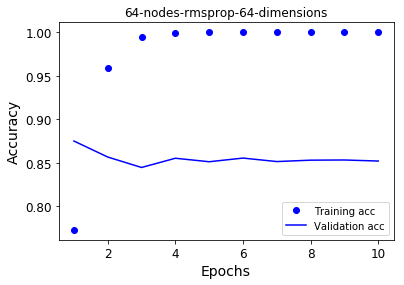

In [15]:
epochs = range(1, 11)

for i in range(8):
    plt.plot(epochs, dense_training_accuracy[i], 'bo', label='Training acc')
    plt.plot(epochs, dense_validation_accuracy[i], 'b', label='Validation acc')
    plt.title(names[i])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Plot the loss of train and validation set.

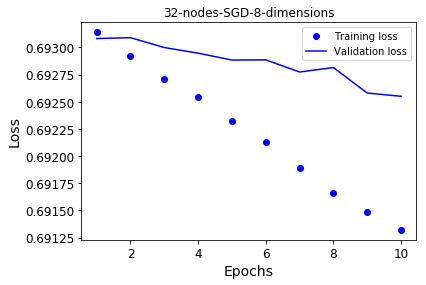

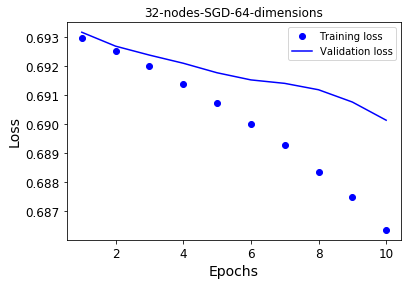

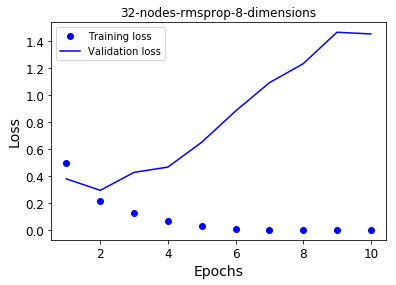

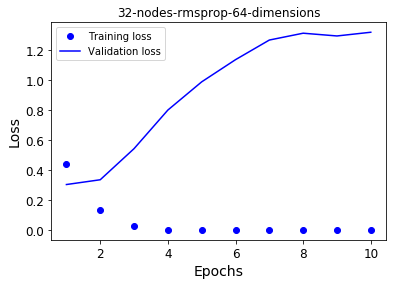

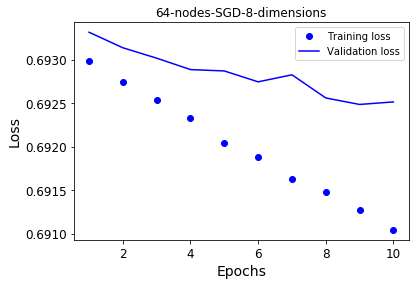

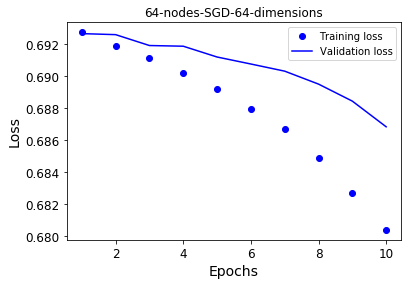

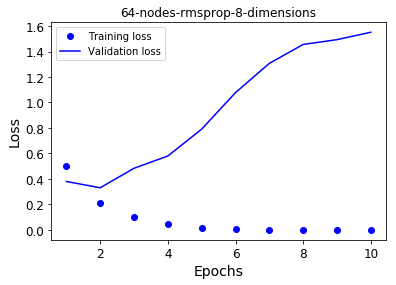

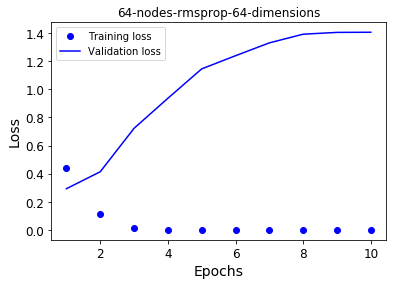

In [16]:
epochs = range(1, 11)

for i in range(8):
    plt.plot(epochs, dense_training_loss[i], 'bo', label='Training loss')
    plt.plot(epochs, dense_validation_loss[i], 'b', label='Validation loss')
    plt.title(names[i])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Print out the runtime.

In [17]:
print(dense_time)

[21.59446897059398, 141.8342526355615, 24.621352520618785, 200.2366340481444, 31.872059860711545, 210.48948294261697, 35.04377797745963, 270.9049229019861]


We first notice that all models strated to overfit at very early stage. More speicfically, after the first 2 training epochs. 

Models built with SGD optimizer had a performance bottleneck of precictive accuracy slightly over than 0.5 on validation set. When we increase the number of nodes in the hidden layers, we didn't see significant improvement on model's performance but the upgoing trend did seem to become more clear. Increasing the dimensionality of embedding layer exhibited similar results. In other words, increasing hidden nodes or embedding dimensionality helps to battle the performance bottleneck issue but not significantly enough to make an impact. 

On the other side, models built with rmsprop optimizer offered much better predictive accuracy on validation set, ranging between 0.84 and 0.88, but still exhibited performance bottleneck. Increasing the number of hidden nodes didn't show notable imapct on model's performance, but increasing the dimensionality of embedding layer did seem to help the model learn more efficiently. In both cases (32 hidden nodes and 64 hidden nodes), predictive accuracy on validation set showed smoother declining trend when higher embedding dimensionality used.

Therefore, we select model 32-nodes-rmsprop-64-dimensions as it offers a relatively satisfying result at a more desired run time to further finetune its hyperparameters.

Finetune the model (32-nodes-rmsprop-64-dimensions)and attempt to mitigate overfitting using the ReduceLROnPlateau callback, dropout layer, and l2 regulartization. 

In [18]:
from keras import regularizers

In [21]:
strat_time=time.clock()
dense_model=models.Sequential()
dense_model.add(layers.Embedding(max_features, 64, input_length=maxlen))
dense_model.add(layers.Flatten())
dense_model.add(layers.Dense(32, activation='relu', kernel_regularizer = regularizers.l2(0.01)))
dense_model.add(layers.Dense(32, activation='relu', kernel_regularizer = regularizers.l2(0.01)))
dense_model.add(layers.Dropout(0.5))
dense_model.add(layers.Dense(1, activation='sigmoid'))
dense_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
callbacks_list = [keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                                    factor=0.1,
                                                    patience=1,)]
history=dense_model.fit(x_train, y_train, epochs=3,
                batch_size=64,
                validation_split=0.2)
dense_test_loss, dense_test_acc=dense_model.evaluate(x_test, y_test)
end_time=time.clock()
dense_run=end_time-start_time

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 23s 1ms/step - loss: 0.7546 - acc: 0.6745 - val_loss: 0.5307 - val_acc: 0.8408
Epoch 2/3
20000/20000 [==============================] - 22s 1ms/step - loss: 0.4600 - acc: 0.8814 - val_loss: 0.4640 - val_acc: 0.8732
Epoch 3/3
25000/25000 [==============================] - 6s 239us/step


In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
dense_run=end_time-start_time

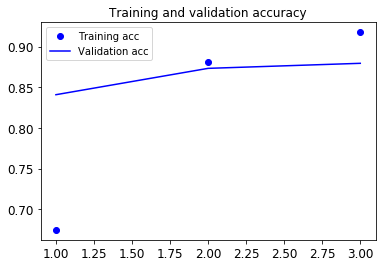

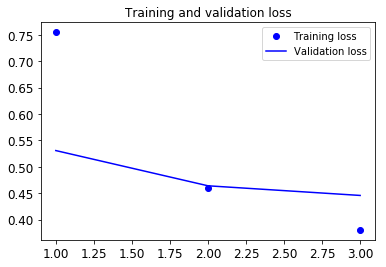

In [23]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
print('\n-----------------------')
print('Dense Neural Network Structure:', names[3])
print('Prediction Accuracy on train set:', acc[2])
print('Prediction Accuracy on valiation set:', val_acc[2])
print('Prediction Accuracy on test set:', dense_test_acc)
print('Loss on train set:', loss[2])
print('Loss on validation set:', val_loss[2])
print('Loss on test set:', dense_test_loss)
print('Run time:', dense_run)


-----------------------
Dense Neural Network Structure: 32-nodes-rmsprop-64-dimensions
Prediction Accuracy on train set: 0.9176
Prediction Accuracy on valiation set: 0.8794
Prediction Accuracy on test set: 0.87244
Loss on train set: 0.38052563281059265
Loss on validation set: 0.4457616727113724
Loss on test set: 0.45306625478744506
Run time: 617.0228980792837


While the strategies we took seem to help with the overfitting issue, we were not able to overcome the performance bottleneck. Therefore, we need to consider more sophisticated models.

# LSTM

As the second part of the research, we will conduct a benchmark experiment of LSTM structure. Due to the computation limitation of personal pc, this experiment was conducted in a 2x2 factorial design. The factors to be considered are: (1) number of units in the LSTM layer: 8 vs. 32, (2) embedding dimensionality: 8 vs. 32. The LSTM network will consist one (1) embedding layer, 1 LSTM layer, and 1 output dense layer. We will use adam optimizer this time. We will compare each model in (1) predictive accuracy on both train and valdation set; (2) loss on both train and validation set; (3) train time.

Define the names of each model, the value for each level of the two factors.

In [12]:
names=['8-units-8-dimensions',
      '8-units-32-dimensions',
      '32-units-8-dimensions',
      '32-units-32-dimensions']

units=[8, 8, 32, 32]
dimensions=[8, 8, 32, 32]

Setup empty list to store the results.

In [13]:
index_for_method=0 
lstm_training_accuracy=[]
lstm_validation_accuracy=[]
lstm_training_loss=[]
lstm_validation_loss=[]
lstm_time=[]

Define the LSTM model.

In [14]:
def lstm_model(dimension, unit):
    model=models.Sequential()
    model.add(layers.Embedding(max_features, dimension, input_length=maxlen))
    model.add(layers.LSTM(unit))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Train each model 5 epochs with a batch_size=64.

In [15]:
for name, dimension, unit in zip(names, dimensions, units):
    print('\n--------------------------------')
    print('\Processing Training Method:', name)
    start_time=time.clock()
    model=lstm_model(dimension, unit)
    history=model.fit(x_train, y_train,
                     epochs=3,
                     batch_size=64,
                     validation_split=0.2)
    end_time=time.clock()
    train_acc=history.history['acc']
    train_loss=history.history['loss']
    val_acc=history.history['val_acc']
    val_loss=history.history['val_loss']
    run_time=end_time-start_time
    lstm_training_accuracy.append(train_acc)
    lstm_validation_accuracy.append(val_acc)
    lstm_training_loss.append(train_loss)
    lstm_validation_loss.append(val_loss)
    lstm_time.append(run_time)
                
    index_for_method += 1


--------------------------------
\Processing Training Method: 8-units-8-dimensions
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 64s 3ms/step - loss: 0.5337 - acc: 0.7311 - val_loss: 0.3754 - val_acc: 0.8506
Epoch 2/3
20000/20000 [==============================] - 66s 3ms/step - loss: 0.2822 - acc: 0.8931 - val_loss: 0.2991 - val_acc: 0.8850
Epoch 3/3
20000/20000 [==============================] - 67s 3ms/step - loss: 0.1811 - acc: 0.9371 - val_loss: 0.2983 - val_acc: 0.8826

--------------------------------
\Processing Training Method: 8-units-32-dimensions
Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 66s 3ms/step - loss: 0.5632 - acc: 0.7140 - val_loss: 0.3940 - val_acc: 0.8554
Epoch 2/3
20000/20000 [==============================] - 65s 3ms/step

Plot prediction accuracy on train and validation set during training.

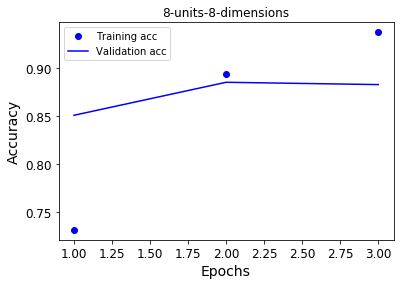

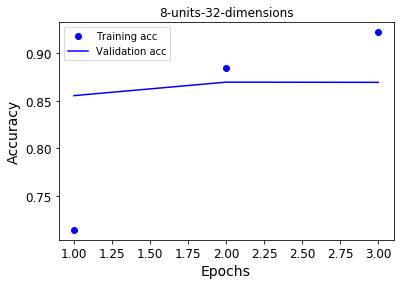

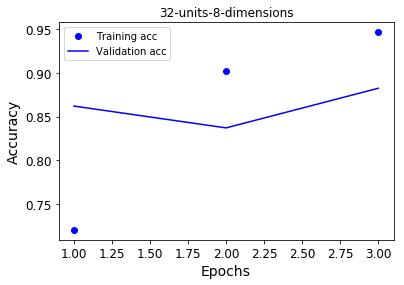

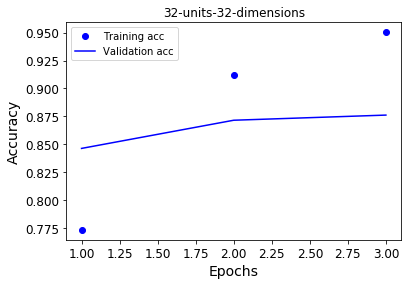

In [16]:
epochs = range(1, 4)

for i in range(4):
    plt.plot(epochs, lstm_training_accuracy[i], 'bo', label='Training acc')
    plt.plot(epochs, lstm_validation_accuracy[i], 'b', label='Validation acc')
    plt.title(names[i])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Plot loss value on train and validation set through the training.

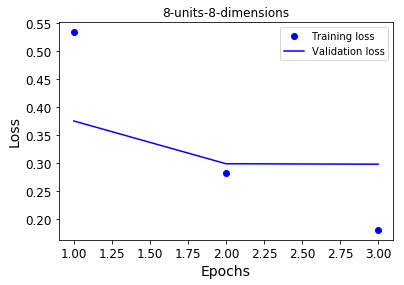

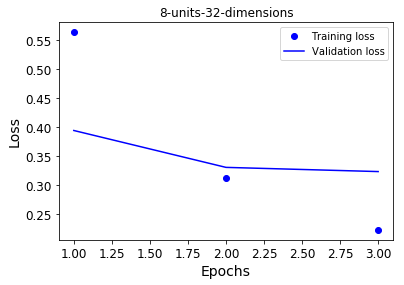

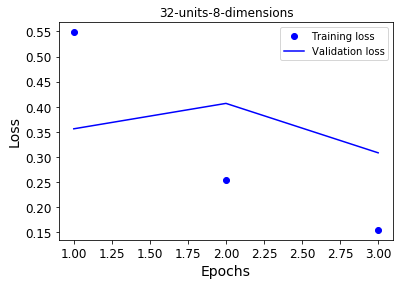

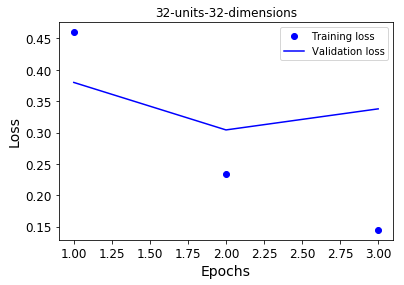

In [17]:
epochs = range(1, 4)

for i in range(4):
    plt.plot(epochs, lstm_training_loss[i], 'bo', label='Training loss')
    plt.plot(epochs, lstm_validation_loss[i], 'b', label='Validation loss')
    plt.title(names[i])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Print the runtime.

In [18]:
print(lstm_time)

[198.50395128809473, 196.41868180731655, 234.7634311152692, 230.32582846479886]


Similar to DNNs, these models start to show overfitting after the first 2 training epochs.We also notice that all models suffer performance bottleneck with none of their prediction accuracy on validation set exceeded 0.89.  Also, the models didn't seem to gain much performance benefits from increased embedding dimensions but did gain small advantage in training time. When we increased the units in the LSMT layer, the train time increased notabley yet offering nonsignificant improvement in precdiction accuracy. Therefore, it is decided to select model 8-units-32-dimensions. 

Finetune the model and attempt to mitigate overfitting using the ReduceLROnPlateau callback, dropout layer, and l2 regulartization. 

In [19]:
from keras import regularizers

strat_time=time.clock()
lstm_model=models.Sequential()
lstm_model.add(layers.Embedding(max_features, 32, input_length=maxlen))
lstm_model.add(layers.LSTM(8))
lstm_model.add(layers.Dense(32))
lstm_model.add(layers.Dropout(0.5))
lstm_model.add(layers.Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
callbacks_list = [keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                                    factor=0.1,
                                                    patience=1,)]
history=lstm_model.fit(x_train, y_train, epochs=3,
                batch_size=64,
                validation_split=0.2)
lstm_test_loss, lstm_test_acc=lstm_model.evaluate(x_test, y_test)
end_time=time.clock()
lstm_run=end_time-start_time

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 71s 4ms/step - loss: 0.4697 - acc: 0.7720 - val_loss: 0.3428 - val_acc: 0.8542
Epoch 2/3
20000/20000 [==============================] - 73s 4ms/step - loss: 0.2529 - acc: 0.9043 - val_loss: 0.2826 - val_acc: 0.8864
Epoch 3/3
25000/25000 [==============================] - 30s 1ms/step


In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

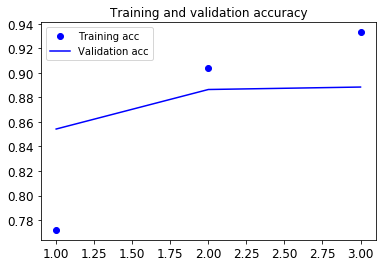

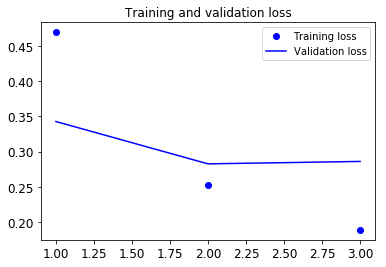

In [21]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
print('\n-----------------------')
print('Dense Neural Network Structure:', names[2])
print('Prediction Accuracy on train set:', acc[2])
print('Prediction Accuracy on valiation set:', val_acc[2])
print('Prediction Accuracy on test set:', lstm_test_acc)
print('Loss on train set:', loss[2])
print('Loss on validation set:', val_loss[2])
print('Loss on test set:', lstm_test_loss)
print('Run time:', lstm_run)


-----------------------
Dense Neural Network Structure: 32-units-8-dimensions
Prediction Accuracy on train set: 0.93305
Prediction Accuracy on valiation set: 0.8884
Prediction Accuracy on test set: 0.8764
Loss on train set: 0.1886103153705597
Loss on validation set: 0.2859843192577362
Loss on test set: 0.3151890360593796
Run time: 1976.6798796081866
